# Is445 Final Project Peers -Clara Chen

Introduction :\
This project aims to provide an overview of the COVID-19 pandemic for peers who are interested in gaining insights into the global situation. The dataset includes information on the country, total cases, total deaths, total recovered cases, active cases, total tests conducted, and the population affected by COVID-19. Considering that peers often seek more detailed and engaging information, this project focuses on utilizing maps as visualization tools. The first visualization provides peers with an overview of the data by highlighting the countries that stand out with the highest and lowest number of cases. This allows them to quickly identify significant trends and noteworthy countries in terms of COVID-19 cases. The second and third visualizations employ heatmaps to represent the total cases and total deaths, respectively. Maps provide a visually captivating way to explore the distribution of cases in different regions, encouraging peers to delve deeper into the details and conduct further analysis on their own.

About the dataset:
1. What is the "name" of the dataset?
    'covid_worldwide.csv'
2. Where did you obtain it? 
    'kaggle'
3. Where can we obtain it? (i.e., URL) 
    https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide
4. What is the license of the dataset? What are we allowed to do with it? 
    License: CC0: Public Domain. 
    With a Public Domain dataset, you are allowed to freely access, use, modify, and distribute the data without any restrictions or permissions. You can analyze the dataset, derive insights, create derivative works, and incorporate the data into your own projects or research, all without the need for explicit authorization or attribution.
5. How big is it in file size and in items?
    The file is 16 KB with 231 rows and 8 columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, LineString
from geopandas import GeoDataFrame
import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import pycountry 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 13.8 MB/s eta 0:00:0000:0100:01


In [2]:
df = pd.read_csv('/Users/lindiachen/Desktop/is445/final project/data/covid_worldwide.csv')
df.head()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"


In [3]:
#Data Cleaning
df.dropna(axis = 0, inplace = True)
df['Total Cases'] = df['Total Cases'].astype(str).str.replace(',', '').astype(float)
df['Total Deaths'] = df['Total Deaths'].astype(str).str.replace(',', '').astype(float)
df['Active Cases'] = df['Active Cases'].astype(str).str.replace(',', '').astype(float)
df['Total Recovered'] = df['Total Recovered'].astype(str).str.replace(',', '').astype(float)

# Visualization 1: top & least 10 death 

In [4]:
#top 10 with hight death level
top_cases= df[['Country','Total Deaths']].sort_values(by="Total Deaths",ascending=False)[:10]
top_cases

,Country,Total Deaths
0,USA,1132935.0
4,Brazil,697074.0
1,India,530740.0
9,Russia,395108.0
18,Mexico,332198.0
34,Peru,218931.0
8,UK,204171.0
7,Italy,186833.0
3,Germany,165711.0
2,France,164233.0


In [5]:
# Top 10 less death Cases
less_cases = df[['Country', 'Total Deaths']].sort_values(by="Total Deaths", ascending=True).head(10)
less_cases

,Country,Total Deaths
216,Nauru,1.0
209,Cook Islands,2.0
219,Saint Pierre Miquelon,2.0
220,Wallis and Futuna,7.0
224,Montserrat,8.0
213,Palau,9.0
217,Anguilla,12.0
185,Tonga,13.0
194,Vanuatu,14.0
147,Bhutan,21.0


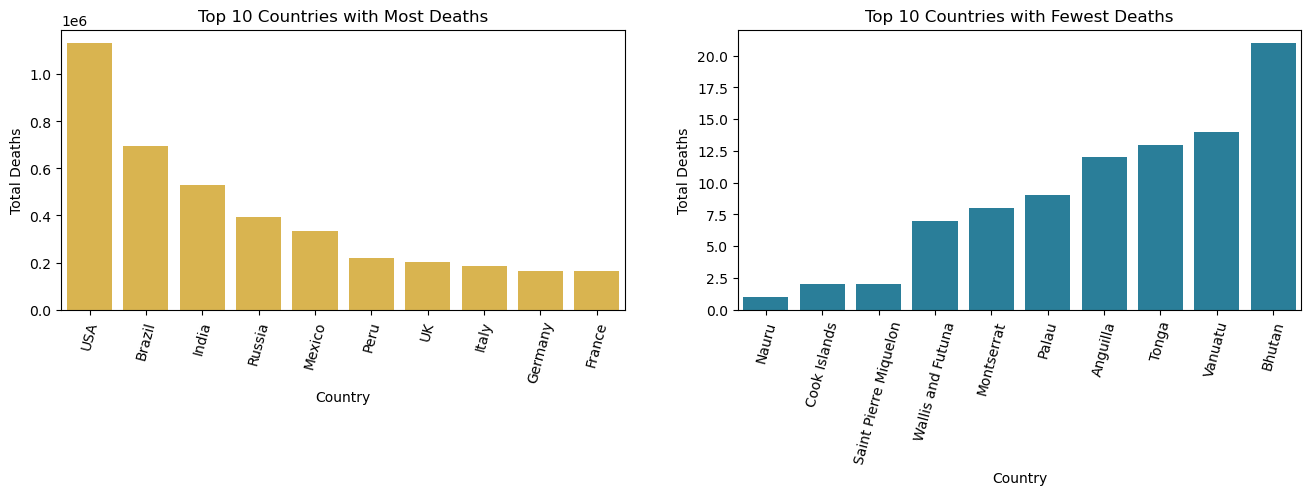

In [6]:
#barplot of top 10 & less 10
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.barplot(data=top_cases, x='Country', y='Total Deaths', color='#F0BE39')
plt.title('Top 10 Countries with Most Deaths')
plt.xticks(rotation=75)

plt.subplot(2, 2, 2)
sns.barplot(data=less_cases, x='Country', y='Total Deaths', color='#1887AB')
plt.title('Top 10 Countries with Fewest Deaths')
plt.xticks(rotation=75)

plt.show()

# Visualization 2: Total Cases on HeatMap

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
def alpha3code(column):
    CODE=[]
    for Country in column:
        try:
            code=pycountry.countries.get(name=Country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# create a column for code 
df['CODE']=alpha3code(df.Country)
df.head()

/var/folders/9l/rwm87p912zj8f6w5qx1c3cl40000gn/T/ipykernel_53385/2226136075.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,CODE
0,1,USA,104196861.0,1132935.0,101322779.0,1741147.0,"1,159,832,679","334,805,269",None
1,2,India,44682784.0,530740.0,44150289.0,1755.0,"915,265,788","1,406,631,776",IND
2,3,France,39524311.0,164233.0,39264546.0,95532.0,"271,490,188","65,584,518",FRA
3,4,Germany,37779833.0,165711.0,37398100.0,216022.0,"122,332,384","83,883,596",DEU
4,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,"63,776,166","215,353,593",BRA


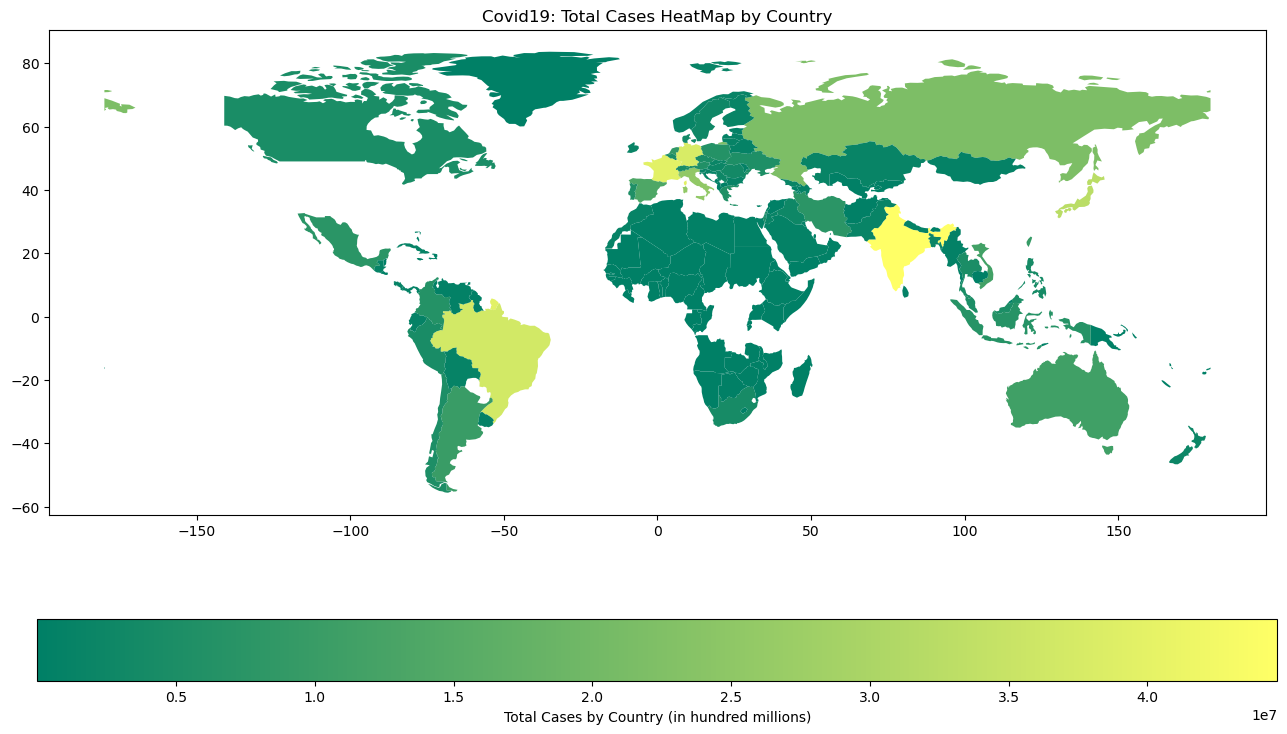

In [52]:
dfmerge = df.merge(world, left_on='Country', right_on='name')
dfmerged = GeoDataFrame(dfmerge)
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title('Covid19: Total Cases HeatMap by Country')
dfmerged.plot(column='Total Cases', legend=True, cmap='summer', ax=ax, legend_kwds={'label': "Total Cases by Country (in hundred millions)",'orientation' : 'horizontal'})
plt.show()

# Visualization 3: Total Death on HeatMap

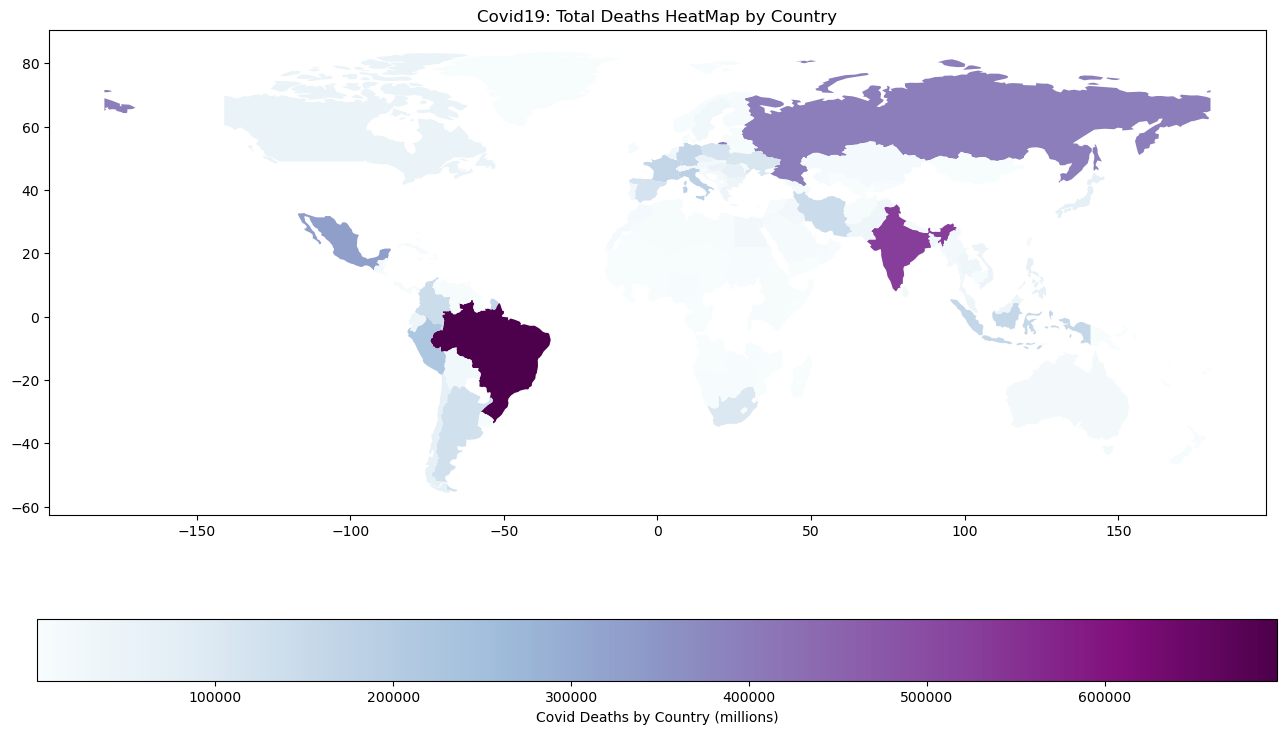

In [53]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_title('Covid19: Total Deaths HeatMap by Country')
dfmerged.plot(column='Total Deaths', legend=True, ax=ax, cmap='BuPu', legend_kwds={'label': "Covid Deaths by Country (millions)",'orientation' : 'horizontal'})
plt.show()